# Gender recognition by voice

Objective
 - This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [56]:
#train_test_split is responsible to split the data into(train and test data)
from sklearn.model_selection import train_test_split
#importing Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#importing Random forest classifier
from sklearn.ensemble import RandomForestClassifier
#importing the classification report results
from sklearn.metrics import classification_report
#impporting comfusion matrix
from sklearn.metrics import confusion_matrix
#import metrix to calculate accuracy
from sklearn import metrics,neighbors
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [58]:
pwd

'C:\\Users\\DELL\\Desktop\\summer_internship\\AIML'

In [59]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\summer_internship\\AIML\\voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [60]:
df.shape

(3168, 21)

In [61]:
# Checking the description
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [62]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [63]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [64]:
#to check if there are any null values
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

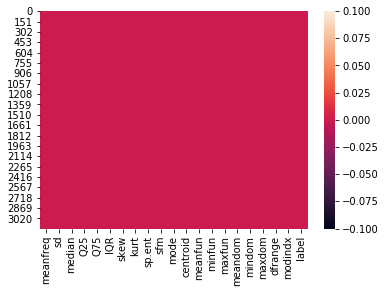

In [65]:
##Visualising the null values by using Heatmap
sns.heatmap(df.isnull())

male      1584
female    1584
Name: label, dtype: int64

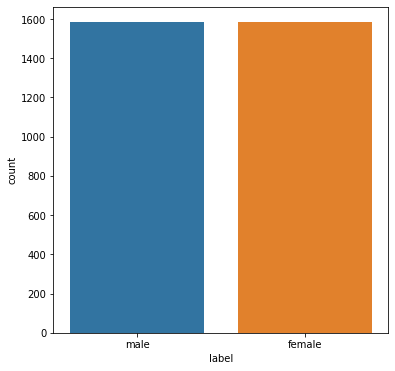

In [66]:
plt.figure(figsize=(6,6))
sns.countplot(df['label']) # plots the count of each category
df.label.value_counts()

## VISUALIZATIONS-

### visulizations for some input columns

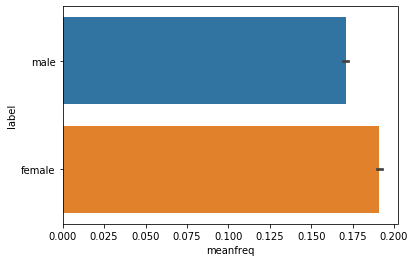

In [67]:
# :meanfreq
sns.barplot(x='meanfreq', y='label', data=df)

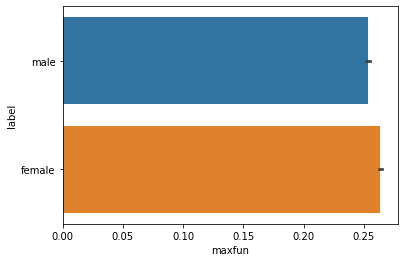

In [68]:
# :maxfun
sns.barplot(x='maxfun', y='label', data=df)

## visulizations for output column


male      1584
female    1584
Name: label, dtype: int64

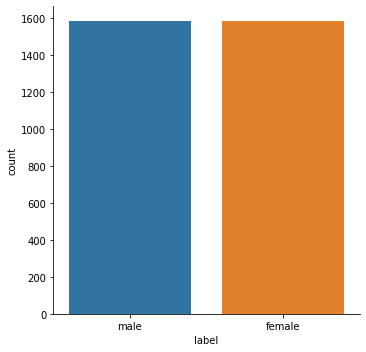

In [69]:
##visulizations for output columns

sns.catplot(x='label',data=df,kind='count')
df.label.value_counts()

In [70]:
# Preparing Input and Output
# Drop the label column
X = df.drop('label', axis=1)
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [72]:
df["label"] = le.fit_transform(df["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [73]:
# Accessing Output Column
y = df.label
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

In [74]:
## Seperate the Input and Output into training data and testing data
##Training--> we will be training the model on training data
##Testing--> check the performance of the model on test data

In [75]:
# Preparing Training and Testing Data
# Storing 70% of the data into training and remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=10)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2217, 20)
(951, 20)
(2217,)
(951,)


## Logistic regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable

In [77]:
# creating an object for Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() 

Data set id divided into 2 parts-
1. We will build the model on training data
2. testing data(we will test the model performance)

In [78]:
## We have to apply this object(log_reg) to the training data
log_reg.fit(X_train, y_train) # with help of fit method we are fitting the 
                            ##Logistic Regression on training data
## objectName.fit(InputData, OutputData)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
## Predicting on the training data
## Syntax: objectName.predict(TrainInput)
y_train_pred = log_reg.predict(X_train)
y_train_pred

array([1, 1, 0, ..., 1, 1, 1])

1. y_train--> original output
2. y_train_pred--> model predicted output

In [80]:
y_train ==y_train_pred  # comparing original data output and model predicted output

1493     True
955      True
3070     True
1234     True
3029     True
        ...  
2009    False
1180    False
1344     True
527      True
1289     True
Name: label, Length: 2217, dtype: bool

In [81]:
# Confusion matrix for training data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf

array([[ 931,  197],
       [  65, 1024]], dtype=int64)

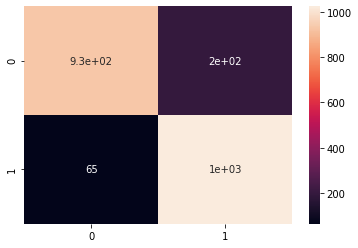

In [82]:
sns.heatmap(conf,annot=True)

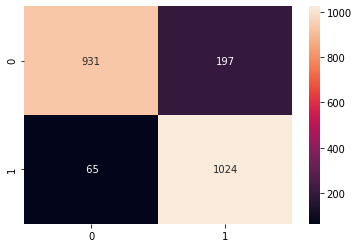

In [83]:
sns.heatmap(conf,annot=True,fmt='3.0f')

In [84]:
## accuracy_score---> With help of this metric, we can evaluate the overall 
## performance of the model
from sklearn.metrics import accuracy_score
lr_train_acc=accuracy_score(y_train, y_train_pred)
print(lr_train_acc)

0.8818222823635543


In [85]:
## Performance Metrics---> To evaluate the model is predicting

In [86]:
## Predict the model on Test:
y_test_pred = log_reg.predict(X_test)
y_test_pred 

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,

In [87]:
y_test==y_test_pred

2513     True
965      True
822      True
980      True
1427     True
        ...  
1307     True
2189     True
2012    False
1398     True
2107     True
Name: label, Length: 951, dtype: bool

In [88]:
## accuracy of the test data(Original test data output and the model predicted 
## output)
lr_test_acc=accuracy_score(y_test, y_test_pred)
lr_test_acc

0.9022082018927445

In [89]:
# Check the train classification report 
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1128
           1       0.84      0.94      0.89      1089

    accuracy                           0.88      2217
   macro avg       0.89      0.88      0.88      2217
weighted avg       0.89      0.88      0.88      2217



In [90]:
# Check the train classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       456
           1       0.88      0.95      0.91       495

    accuracy                           0.90       951
   macro avg       0.91      0.90      0.90       951
weighted avg       0.90      0.90      0.90       951



In [91]:
log_reg.predict_proba(X_test)

array([[0.84141444, 0.15858556],
       [0.25698783, 0.74301217],
       [0.29292289, 0.70707711],
       ...,
       [0.20936895, 0.79063105],
       [0.48583758, 0.51416242],
       [0.93680249, 0.06319751]])

In [92]:
## Importing ROC-AUC metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test,log_reg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,log_reg.predict_proba(X_test) [:,1])

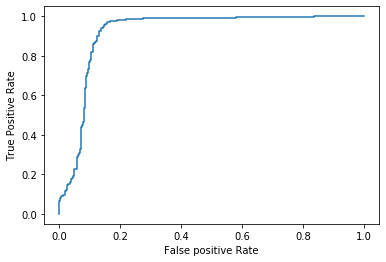

In [93]:
## visualizing the ROC-AUC  Curve
plt.figure()
plt.plot(fpr,tpr,roc_auc)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [94]:
roc_auc

0.9002724614566721

### Random Forest Algorithm
Random forest is a supervised learning algorithm which is used for both classification as well as regression. ... Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.

### Why use Random Forest Algorithm
. It provides higher accuracy. Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data. If there are more trees, it won't allow overfitting trees in the model.

In [202]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=40)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [203]:
##prediction on train data
##syntax:objname.ppredict(input_values)
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_train_pred))
rfc_train_acc=accuracy_score(y_train,y_train_pred)
print(rfc_train_acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1128
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217

1.0


In [204]:
#check the accuracy
rfc_test_acc=accuracy_score(y_test,y_test_pred)
print(rfc_test_acc)

0.9674027339642481


In [205]:
# Confusion Matrix of Training data
#Syntax: confusion_matrix(ActualValues, Predicted Values)
print(confusion_matrix(y_test,y_test_pred))

[[438  18]
 [ 13 482]]


In [206]:
# Check the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       456
           1       0.96      0.97      0.97       495

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



In [207]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test,rfc.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,rfc.predict_proba(X_test) [:,1])

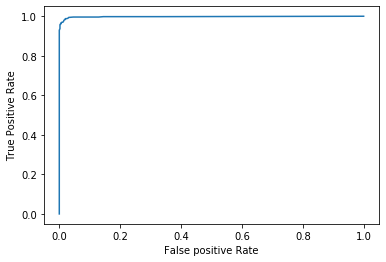

In [208]:
plt.figure()
plt.plot(fpr,tpr,roc_auc)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [209]:
roc_auc

0.9822235513024986

### DECISION TREE
1. A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. identifies ways to split a data set based on different conditions.It partitions the tree in recursively manner call recursive partitioning.
2. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [214]:
# Apply the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

#initailization of object
dtree = DecisionTreeClassifier()

# Applying the classifier to the dataset
# syntax: objectname.fit(InputValues, OutputValues)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [215]:
# Predict on training data
y_train_pred = dtree.predict(X_train)
y_train_pred

array([1, 1, 0, ..., 1, 1, 1])

In [216]:
# Classification Report on training data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1128
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217



In [217]:
confusion_matrix(y_train, y_train_pred)

array([[1128,    0],
       [   0, 1089]], dtype=int64)

In [218]:
# Prediction on test data(unseen data)
# Syntax: objectname.predict(InputValues)
y_test_pred =  dtree.predict(X_test)  #  corresponding output of X_test is stored in y_test
# Comapre the actual y_test values with model predicted y_test_pred values
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       456
           1       0.96      0.97      0.97       495

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



In [219]:
from sklearn.metrics import accuracy_score
predictions=dtree.predict(X_train)
accuracy_score(y_train,predictions)

1.0

In [220]:
predictions=dtree.predict(X_test)
accuracy_score(y_test,predictions)

0.9663512092534174

In [221]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test,dtree.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,dtree.predict_proba(X_test) [:,1])

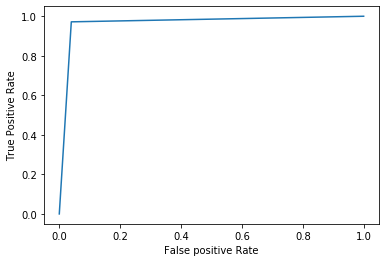

In [222]:
plt.figure()
plt.plot(fpr,tpr,roc_auc)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [213]:
roc_auc

0.9671318447634237

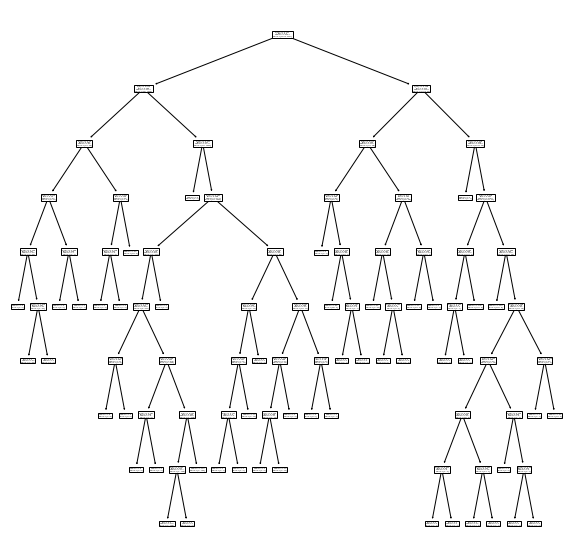

In [121]:
# Visualization of the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtree)
plt.show()

In [148]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, X_train, y_train, cv =5)

array([0.95720721, 0.96846847, 0.95711061, 0.95711061, 0.97065463])

In [123]:
## hyper parameters
## Gridsearch-->find optimum parameters
grid_param={"criterion":['gini','entropy'],
            'max_depth' :range(2,32,1),
            'min_samples_leaf':range(1,10,1)}


In [128]:
from sklearn.model_selection import GridSearchCV

## intilization
grid_search=GridSearchCV(estimator=dtree,param_grid=grid_param,cv=5)

##applying gridsearch onto dataset
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [129]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5}

In [134]:
## we have to build the model with best paramters
##initialze the DT clssifier

clf=DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=5)

## we need to fit the model of the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [135]:
## prediction on train data
pred_train=clf.predict(X_train)

## compare the actual y_test values and pred_test after grid search
print(classification_report(y_train,pred_train))
clf_train_acc=accuracy_score(y_train,pred_train)
print(clf_train_acc)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1128
           1       0.99      0.97      0.98      1089

    accuracy                           0.98      2217
   macro avg       0.98      0.98      0.98      2217
weighted avg       0.98      0.98      0.98      2217

0.9833107803337844


In [136]:
## prediction on test data
pred_test=clf.predict(X_test)

## compare the actual y_test values and pred_test after grid search
print(classification_report(y_test,pred_test))
clf_test_acc=accuracy_score(y_test,pred_test)
print(clf_test_acc)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       456
           1       0.98      0.96      0.97       495

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

0.9674027339642481


In [147]:
### cross-validation score for grid search 
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train,y_train,cv=5)

array([0.95720721, 0.97972973, 0.95711061, 0.97291196, 0.96388262])

In [146]:
### cross-validation score for decision tree
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=5)

array([0.95045045, 0.97072072, 0.95936795, 0.96388262, 0.96839729])

### I compared the model(decision tree classifier) with unknown data

In [142]:
print(clf.predict([[0.06,0.07,0.15,0.13,0.06,0.08,0.07,0.15,0.06,0.08,0.24,0.01,0.07,0.15,0.13,0.06,0.08,0.07,0.15,0.01]]))

[1]


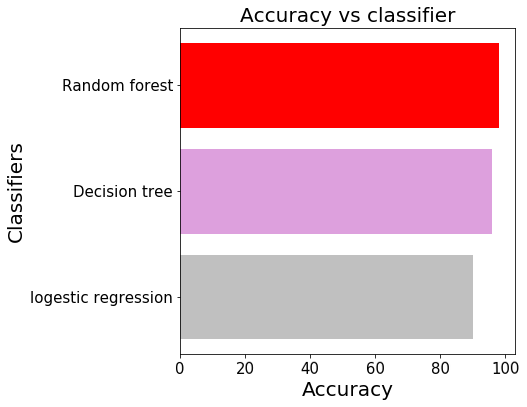

In [210]:
### Comparing the accuracy with (knn,dtc,random forest classifier)
roc_auc=[90,96,98]
plt.figure(figsize=(6,6))
colors=['silver','plum','red']
labels=['logestic regression','Decision tree','Random forest']
plt.barh(labels,roc_auc,color=colors)
plt.xlabel("Accuracy",fontsize=20)
plt.ylabel("Classifiers",fontsize=20)
plt.title("Accuracy vs classifier",fontsize=20)
plt.xticks(rotation=1,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### From the above observation Random forest Classifier is best model to predict the given problem statement
We can say that the highest accurracy is made by Random forest Classifier.